Based on the video below
https://www.youtube.com/watch?v=6maH8Lh3pK4

https://blog.keras.io/building-autoencoders-in-keras.html

Make the NN summarise the information the are looking at.

Useful for compression and denoising

In [1]:
from keras.layers import Input, Dense, Flatten, Reshape, UpSampling2D, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping

from keras.datasets import mnist
from keras.datasets import fashion_mnist

import numpy as np

Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [0]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
               callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=20)])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.3548 - val_loss: 0.2683
Epoch 2/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.2585 - val_loss: 0.2445
Epoch 3/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.2340 - val_loss: 0.2221
Epoch 4/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.2158 - val_loss: 0.2072
Epoch 5/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.2027 - val_loss: 0.1956
Epoch 6/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.1920 - val_loss: 0.1859
Epoch 7/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.1833 - val_loss: 0.1783
Epoch 8/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.1765 - val_loss: 0.1721
Epoch 9/50
60000/60000 [==============================] - 4s 6

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

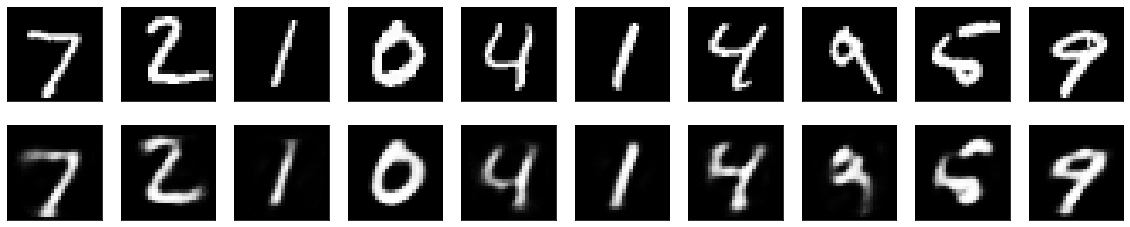

In [10]:
# use Matplotlib (don't ask)
%matplotlib inline
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In the previous example, the representations were only constrained by the size of the hidden layer (32). In such a situation, what typically happens is that the hidden layer is learning an approximation of PCA (principal component analysis). But another way to constrain the representations to be compact is to add a sparsity contraint on the activity of the hidden representations, so fewer units would "fire" at a given time. In Keras, this can be done by adding an activity_regularizer to our Dense layer:



In [0]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [13]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
               callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=20)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 111us/step - loss: 0.3363 - val_loss: 0.2639
Epoch 2/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.2585 - val_loss: 0.2519
Epoch 3/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.2430 - val_loss: 0.2336
Epoch 4/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.2249 - val_loss: 0.2161
Epoch 5/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.2118 - val_loss: 0.2096
Epoch 6/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.2058 - val_loss: 0.2083
Epoch 7/100
60000/60000 [==============================] - 6s 103us/step - loss: 1.8154 - val_loss: 2.6048
Epoch 8/100
60000/60000 [==============================] - 6s 99us/step - loss: 2.5514 - val_loss: 2.5510
Epoch 9/100
60000/60000 [==============================] - 6s 98us/step - loss: 2.5403 - val_lo

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

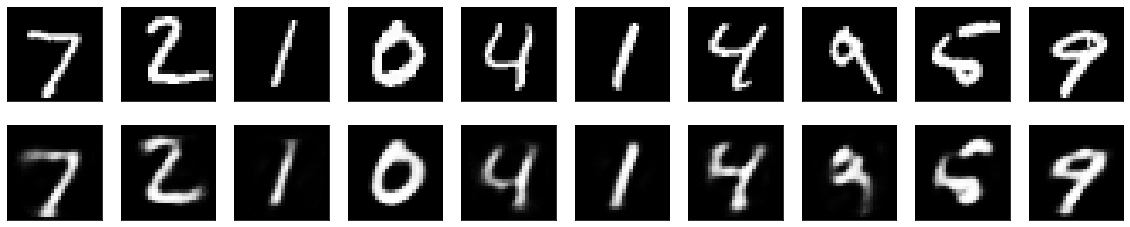

In [15]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()